In [84]:
import hikinggc
from importlib import reload
reload(hikinggc)

import os
import geojson
import json
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patheffects as path_effects

import geopandas

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()

import logging

In [79]:
datafile = "../Data/municipiosGC.json"
m = hikinggc.Municipios()
m.get_from_json(datafile)
m.name

['Agaete',
 'Agüimes',
 'Artenara',
 'Arucas',
 'Firgas',
 'Gáldar',
 'Ingenio',
 'Mogán',
 'Moya',
 'Las Palmas de Gran Canaria',
 'San Bartolomé de Tirajana',
 'La Aldea de San Nicolás',
 'Santa Brígida',
 'Santa Lucía de Tirajana',
 'Santa María de Guía de Gran Canaria',
 'Tejeda',
 'Telde',
 'Teror',
 'Valsequillo de Gran Canaria',
 'Valleseco',
 'Vega de San Mateo']

In [55]:
with open(datafile, "r") as f:
    data = json.load(f)

    
municipiosDict = {}
lonall, latall = [], []
for iim, municipios in enumerate(data["features"]):
    
    
    # Check if in Gran Canaria
    if municipios['properties']['CODNUT3'] == 'ES705':
        name = municipios['properties']['NAMEUNIT']
        print(name)
        
        # Get the coordinates
        coords = municipios['geometry']['coordinates']

        for c1 in coords:
            lon = []
            lat = []
            for c2 in c1:
                # cproj = [[m(c3[0], c3[1])[0], m(c3[0], c3[1])[1]] for c3 in c2]
                for c3 in c2:
                    lon.append(c3[0])
                    lat.append(c3[1])
            municipiosDict[name] = [lon, lat]
            lonall.append(lon)
            latall.append(lat)

Agaete
Agüimes
Artenara
Arucas
Firgas
Gáldar
Ingenio
Mogán
Moya
Las Palmas de Gran Canaria
San Bartolomé de Tirajana
La Aldea de San Nicolás
Santa Brígida
Santa Lucía de Tirajana
Santa María de Guía de Gran Canaria
Tejeda
Telde
Teror
Valsequillo de Gran Canaria
Valleseco
Vega de San Mateo


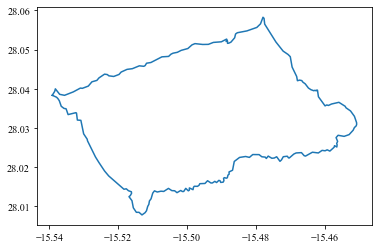

In [58]:
plt.plot(municipiosDict["Santa Brígida"][0], municipiosDict["Santa Brígida"][1])
plt.show()

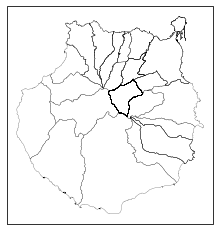

In [47]:
fig = plt.figure()
ax = plt.subplot(111, projection=hikinggc.main_crs)
m.add_to_plot(ax, color="k", lw=.2)
plt.save

## Gran Canaria coast

In [86]:
GCcoastfile = "../Data/Coastline/GCcontour1.geojson"
GCcoastfile2 = "../Data/GCcoast.dat"
GC = hikinggc.Island()
GC.get_coastline(GCcoastfile)

20

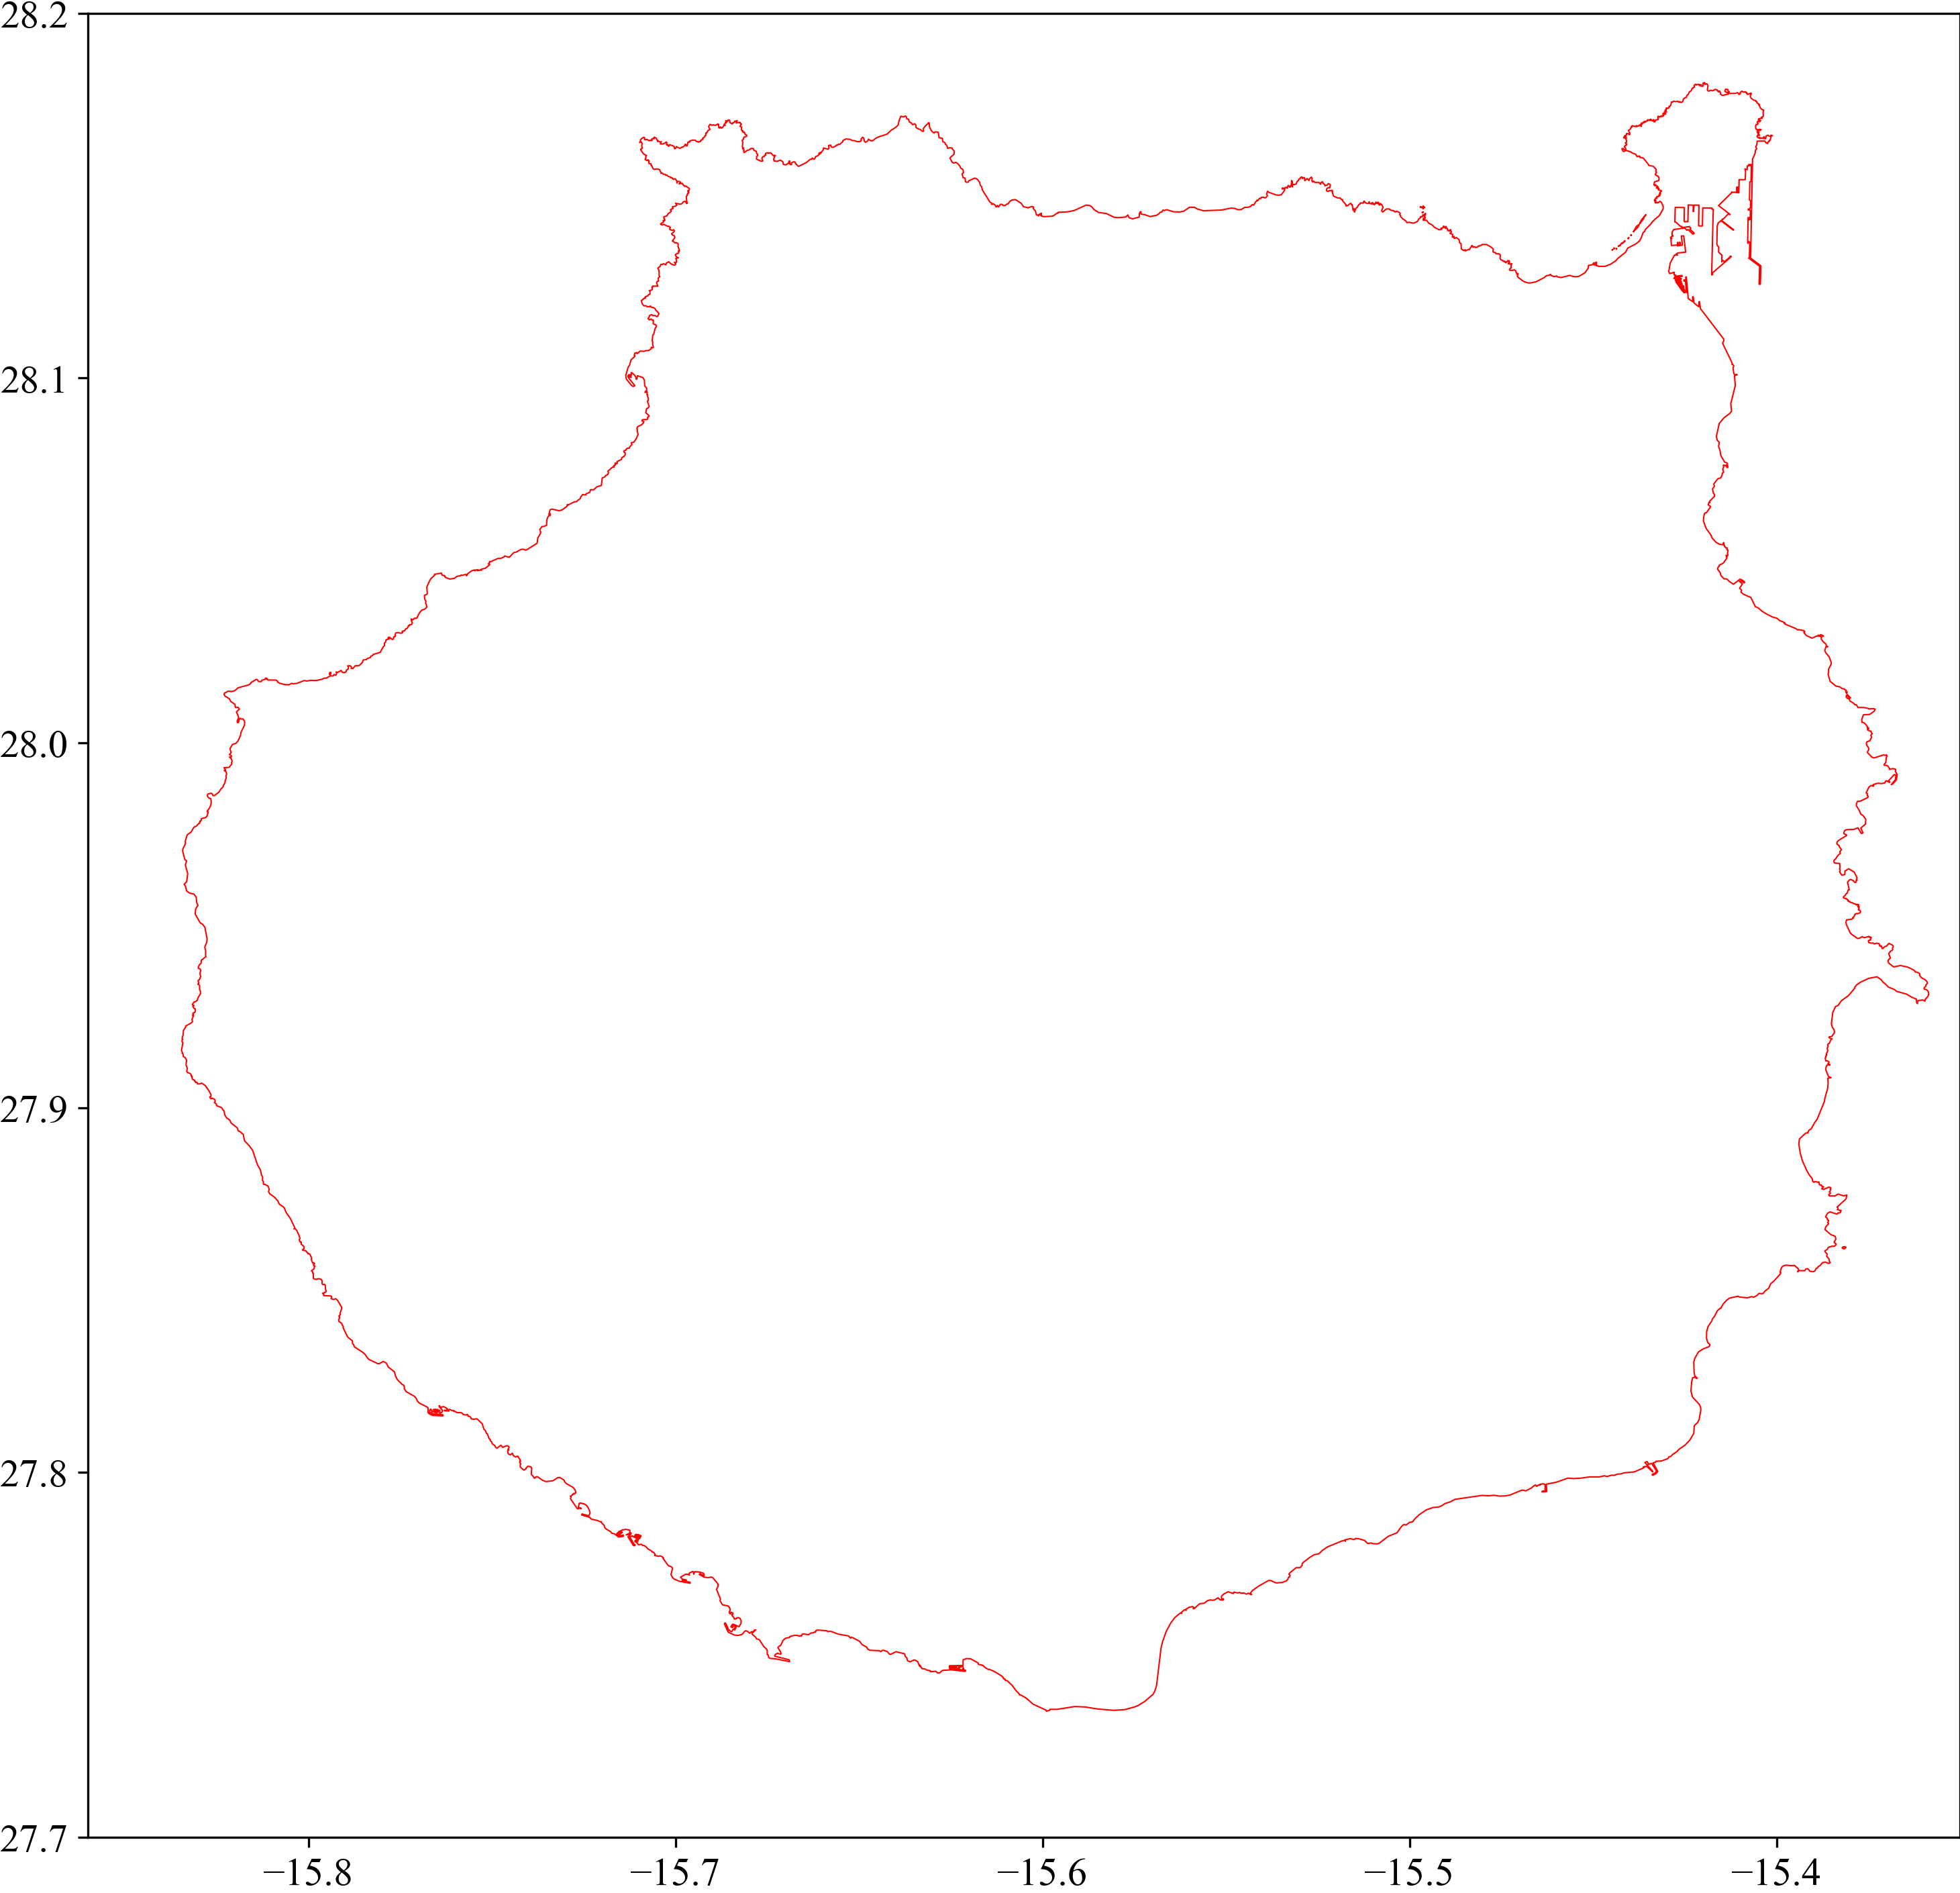

In [87]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)

for llon, llat in zip(GC.contour[0], GC.contour[1]):
    ax.plot(llon, llat, linewidth=.5, color="r")

plt.xlim(hikinggc.gccoords[0], hikinggc.gccoords[1])
plt.ylim(hikinggc.gccoords[2], hikinggc.gccoords[3])

plt.show()

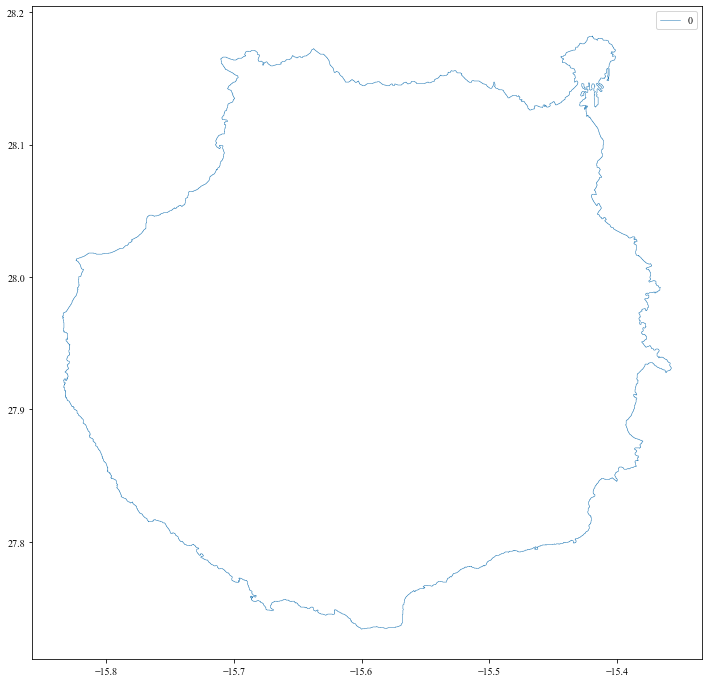

In [50]:
outputfile = "GCcoast.dat"
with open(outputfile, "w") as out:
    coords = data['features'][0]['geometry']['coordinates']
    fig = plt.figure(figsize=(12, 12))
    # print(i)
    for ic, contour in enumerate(coords[4:5]):
        lon, lat = [], []
        # print(ic)
        c0 = contour[0]
        for j in range(0, len(c0)):
            lon.append(c0[j][0])
            lat.append(c0[j][1])
            out.writelines(f"{c0[j][0]}, {c0[j][1]} \n")
        plt.plot(lon, lat, linewidth=.5, label=ic)
    #plt.xlim(hikinggc.gccoords[0], hikinggc.gccoords[1])
    #plt.ylim(hikinggc.gccoords[2], hikinggc.gccoords[3])
    plt.legend()
    plt.show()

In [4]:
GC = hikinggc.Island(coordinates=hikinggc.gccoords)
GC.get_island_polygon("../Data/municipiosGC.json")

AttributeError: 'Island' object has no attribute 'polygon'

In [132]:
GC.

AttributeError: 'Island' object has no attribute 'coordinates'

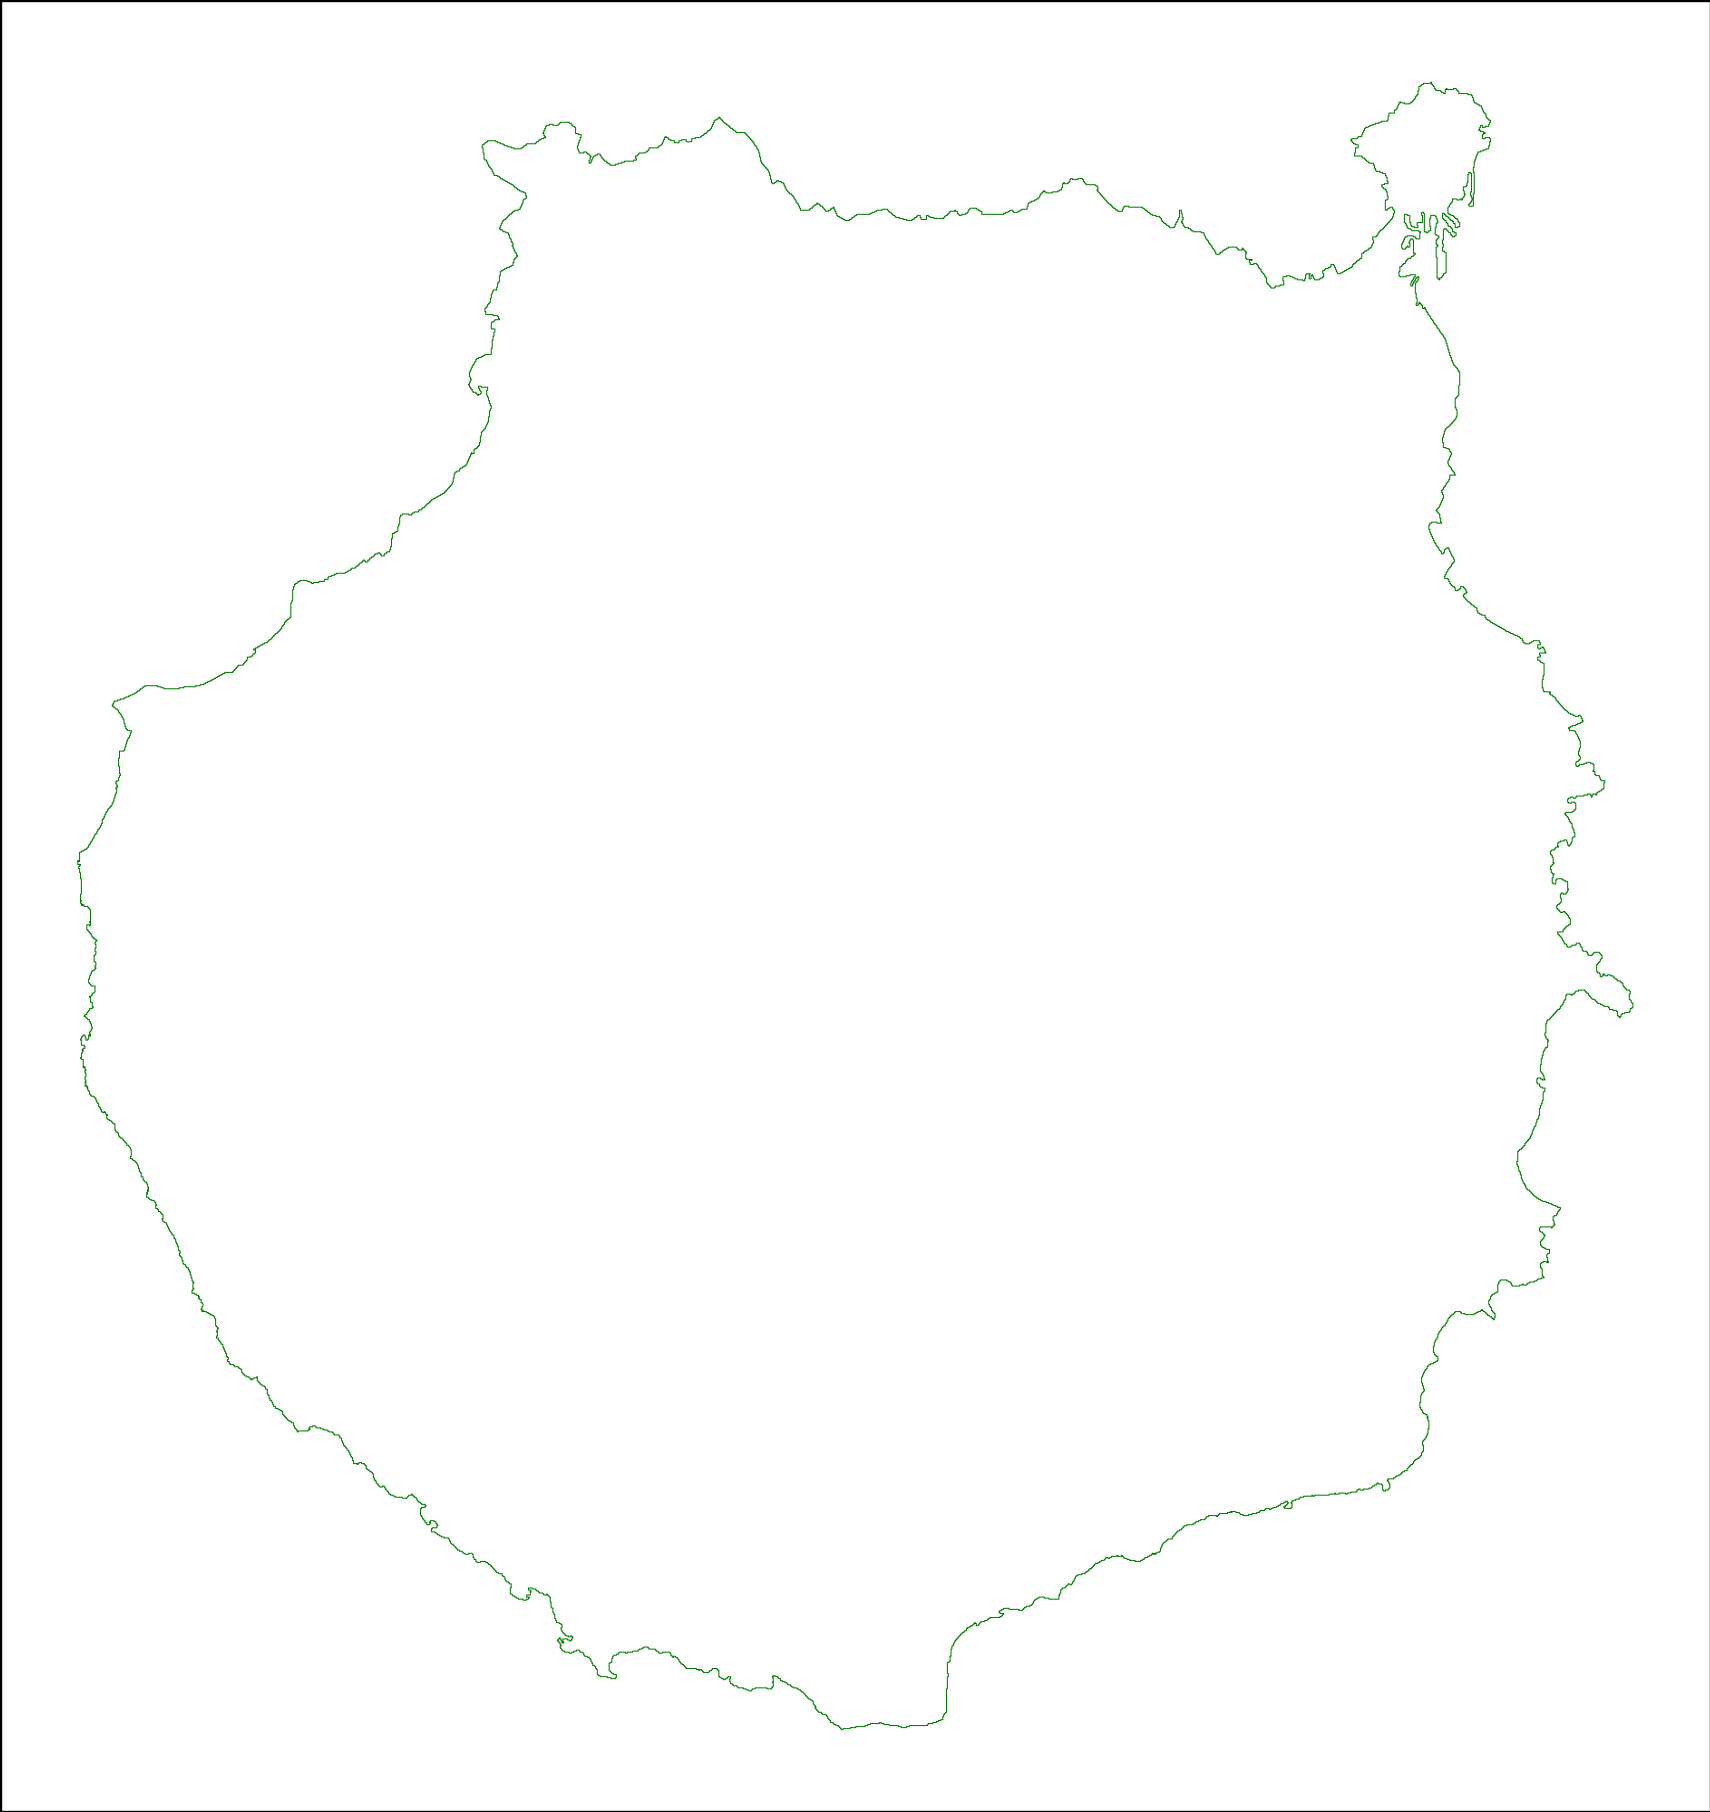

In [121]:
fig = plt.figure()
ax = plt.subplot(111, projection=hikinggc.main_crs)
ax.plot(x, y, transform=hikinggc.data_crs, lw=.5)
#ax.plot(lon0, lat0, transform=hikinggc.data_crs, color="g", lw=.25)
plt.show()